In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#データ読み込み　Yは最初の列に配置する
dataframe = pandas.read_csv('tokyo-weather-2003-2012.csv', usecols=[0,3,4,5,6], engine='python', skipfooter=1)
plt.plot(dataframe)
plt.show()
print(dataframe.head())

Using TensorFlow backend.


   ice_sales  avg_temp  total_rain  humidity  num_day_over25deg
0        331       9.3       101.0        46                  0
1        268       9.9        53.5        52                  0
2        365      12.7       159.5        49                  0
3        492      19.2       121.0        61                  3
4        632      22.4       172.5        65                  7


In [2]:
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

79 40


In [4]:
# convert an array of values into a dataset matrix
# if you give look_back 3, a part of the array will be like this: Jan, Feb, Mar
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        xset = []
        for j in range(dataset.shape[1]):
            a = dataset[i:(i+look_back), j]
            xset.append(a)
        dataY.append(dataset[i + look_back, 0])      
        dataX.append(xset)
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps(number of variables), features] *convert time series into column
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

print("textX.shape")
print(testX.shape, "\n")
print("testX.shape[1]")
print(testX.shape[1], "\n")
print("textX.shape[2]")
print(testX.shape[2], "\n")
print("testX")
print(testX, "\n")
print("testX[0]")
print(testX[0], "\n")
print("testY.shape")
print(testY, "\n")
print("testY")
print(testY)

textX.shape
(27, 5, 12) 

testX.shape[1]
5 

textX.shape[2]
12 

testX
[[[ 0.80050719  0.38461539  0.19188505 ...,  0.40912935  0.4843618
    0.79712594]
  [ 0.86507934  0.72222215  0.55555546 ...,  0.58333331  0.76190466
    0.92460316]
  [ 0.30714747  0.06374758  0.35157761 ...,  0.14230523  0.13457824
    0.0856407 ]
  [ 0.84615391  0.71794873  0.71794873 ...,  0.61538464  0.79487187
    0.87179488]
  [ 0.96774191  0.6774193   0.16129032 ...,  0.25806451  0.77419353  1.        ]]

 [[ 0.38461539  0.19188505  0.11327136 ...,  0.4843618   0.79712594  1.        ]
  [ 0.72222215  0.55555546  0.34523803 ...,  0.76190466  0.92460316
    0.99999994]
  [ 0.06374758  0.35157761  0.19059885 ...,  0.13457824  0.0856407
    0.03026401]
  [ 0.71794873  0.71794873  0.69230765 ...,  0.79487187  0.87179488
    0.79487187]
  [ 0.6774193   0.16129032  0.03225806 ...,  0.77419353  1.          1.        ]]

 [[ 0.19188505  0.11327136  0.14539307 ...,  0.79712594  1.          0.50380385]
  [ 0.55555546 

In [5]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(testX.shape[1], look_back)))	#shape：変数数、遡る時間数
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0558
Epoch 2/100
 - 0s - loss: 0.0206
Epoch 3/100
 - 0s - loss: 0.0143
Epoch 4/100
 - 0s - loss: 0.0126
Epoch 5/100
 - 0s - loss: 0.0114
Epoch 6/100
 - 0s - loss: 0.0112
Epoch 7/100
 - 0s - loss: 0.0099
Epoch 8/100
 - 1s - loss: 0.0096
Epoch 9/100
 - 1s - loss: 0.0087
Epoch 10/100
 - 0s - loss: 0.0085
Epoch 11/100
 - 1s - loss: 0.0084
Epoch 12/100
 - 1s - loss: 0.0075
Epoch 13/100
 - 0s - loss: 0.0072
Epoch 14/100
 - 1s - loss: 0.0069
Epoch 15/100
 - 0s - loss: 0.0068
Epoch 16/100
 - 0s - loss: 0.0062
Epoch 17/100
 - 1s - loss: 0.0065
Epoch 18/100
 - 0s - loss: 0.0060
Epoch 19/100
 - 1s - loss: 0.0058
Epoch 20/100
 - 0s - loss: 0.0056
Epoch 21/100
 - 1s - loss: 0.0054
Epoch 22/100
 - 0s - loss: 0.0051
Epoch 23/100
 - 0s - loss: 0.0051
Epoch 24/100
 - 1s - loss: 0.0048
Epoch 25/100
 - 1s - loss: 0.0051
Epoch 26/100
 - 1s - loss: 0.0047
Epoch 27/100
 - 0s - loss: 0.0047
Epoch 28/100
 - 0s - loss: 0.0042
Epoch 29/100
 - 0s - loss: 0.0044
Epoch 30/100
 - 0s - lo

In [6]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
pad_col = numpy.zeros(dataset.shape[1]-1)

# invert predictions
def pad_array(val):
    return numpy.array([numpy.insert(pad_col, 0, x) for x in val])
    
trainPredict = scaler.inverse_transform(pad_array(trainPredict))
trainY = scaler.inverse_transform(pad_array(trainY))
testPredict = scaler.inverse_transform(pad_array(testPredict))
testY = scaler.inverse_transform(pad_array(testY))

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 44.20 RMSE
Test Score: 88.49 RMSE


[ 1451.00000179   863.99995152   503.99999229   351.00001666   423.00001556
   345.99998981   289.00000096   329.00000427   462.0000135    672.00001322
   791.00001777  1264.99998995  1241.00000207   767.00002989   515.99998623
   392.99999546   423.00001556   338.99998747   274.00000854   384.99998774
   523.99999394   671.00000785   797.99998485  1165.00001694  1331.99992673
   848.99997673   515.00001611]
[ 1178.5944349    712.95115688   450.20584495   369.65974705   417.21719646
   369.35752254   340.50888007   392.20723453   551.98378548   652.28875942
   804.16208959  1068.72464439  1239.16068884   728.95254729   482.56577055
   346.89758489   393.83386504   350.1587521    299.93236824   375.59131184
   507.67801938   656.30450514   786.09416008  1102.23490758  1171.32363009
   748.11539172   416.30434429]


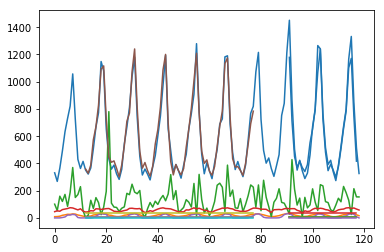

In [7]:
print(testY[:,0])
print(testPredict[:,0])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()